# Candlesticks

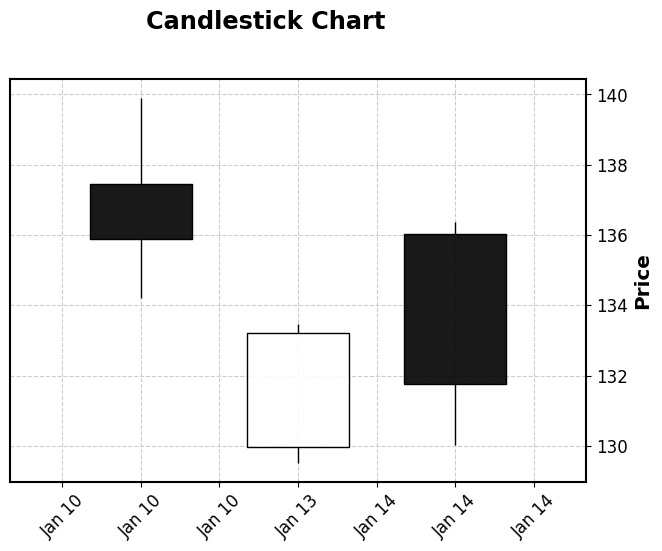

In [4]:
import mplfinance as mpf
import pandas as pd
import yfinance as yf
ticker = "NVDA"
data = yf.Ticker(ticker).history(start="2025-01-10", end="2025-01-15")
df = pd.DataFrame(data).dropna()
# mpf.plot(df, type='candle', style='charles', title='Candlestick Chart') # use this for green and red
mpf.plot(df, type='candle', style='classic', title='Candlestick Chart')


In [10]:
data = yf.Ticker("AAPL").history(start="2024-01-01", end="2024-02-01")

In [12]:
len(data)

21

# Listing 10.2 SMA and EMAs

In [35]:
price = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
#price = [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]
import pandas as pd

data = {
    "Date": pd.date_range(start="2023-01-01", periods=10),
    "Price": price,
}
df = pd.DataFrame(data)

window_size = 3
df['SMA'] = df['Price'].rolling(window=window_size).mean()    #A
df['EMA'] = df['Price'].ewm(span=window_size, adjust=False).mean()    #B


In [36]:
df

,Date,Price,SMA,EMA
0,2023-01-01,1000,NaN,1000.000000
1,2023-01-02,1100,NaN,1050.000000
2,2023-01-03,1200,1100.0,1125.000000
3,2023-01-04,1300,1200.0,1212.500000
4,2023-01-05,1400,1300.0,1306.250000
5,2023-01-06,1500,1400.0,1403.125000
6,2023-01-07,1600,1500.0,1501.562500
7,2023-01-08,1700,1600.0,1600.781250
8,2023-01-09,1800,1700.0,1700.390625
9,2023-01-10,1900,1800.0,1800.195312


### Listing 10.3

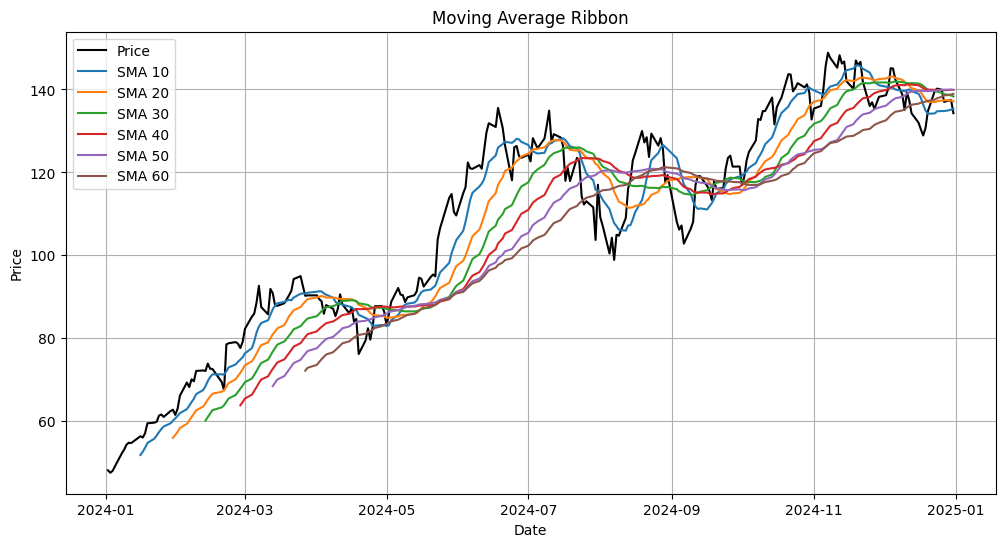

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

ticker = "NVDA"
df = yf.Ticker(ticker).history(start="2024-01-1", end="2025-01-1")
df.reset_index(inplace=True)

# Define moving average periods for the ribbon
periods = [10, 20, 30, 40, 50, 60]
for period in periods:
    df[f"SMA_{period}"] = df["Close"].rolling(window=period).mean()

# Plot Moving Average Ribbon
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Close"], label="Price", color="black", linewidth=1.5)
for period in periods:
    plt.plot(df["Date"], df[f"SMA_{period}"], label=f"SMA {period}")
plt.title("Moving Average Ribbon")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


# Ichomoku

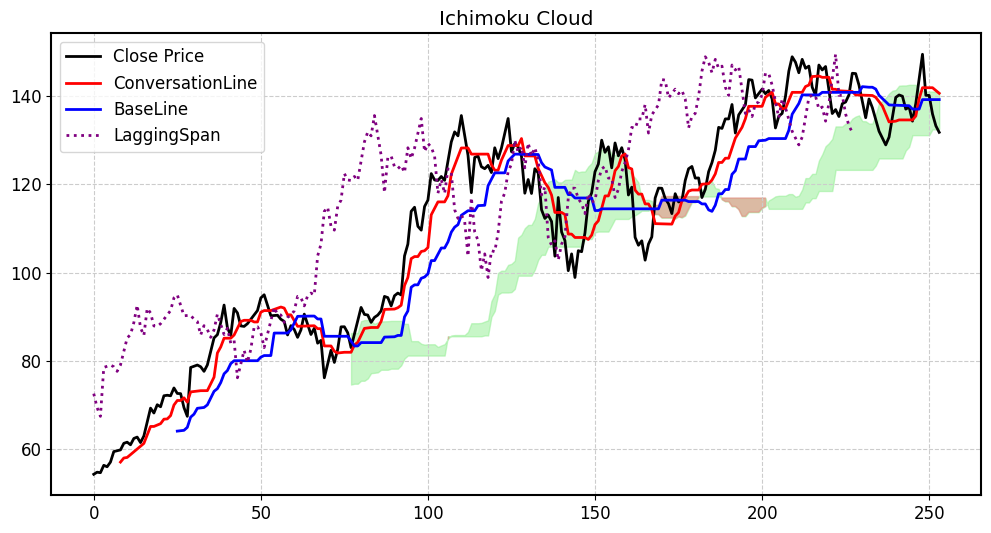

In [8]:
import yfinance as yf
import matplotlib.pyplot as plt
ticker = "NVDA"
data = yf.Ticker(ticker).history(start="2024-01-10", end="2025-01-15")
df = pd.DataFrame(data).dropna()
df.reset_index(inplace=True)

df["ConversationLine"] = (df["Close"].rolling(window=9).max() + df["Close"].rolling(window=9).min()) / 2    #A
df["BaseLine"] = (df["Close"].rolling(window=26).max() + df["Close"].rolling(window=26).min()) / 2    #A
df["SpanA"] = ((df["ConversationLine"] + df["BaseLine"]) / 2).shift(26)
df["SpanB"] = ((df["Close"].rolling(window=52).max() + df["Close"].rolling(window=52).min()) / 2).shift(26)    #A
df["LaggingSpan"] = df["Close"].shift(-26)    #A

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Close Price", color="black")
plt.plot(df.index, df["ConversationLine"], label="ConversationLine", color="red")
plt.plot(df.index, df["BaseLine"], label="BaseLine", color="blue")
plt.fill_between(df.index, df["SpanA"], df["SpanB"], where=df["SpanA"] >= df["SpanA"], color="lightgreen", alpha=0.5)
plt.fill_between(df.index, df["SpanA"], df["SpanB"], where=df["SpanA"] < df["SpanB"], color="lightcoral", alpha=0.5)
plt.plot(df.index, df["LaggingSpan"], label="LaggingSpan", color="purple", linestyle="dotted")

plt.title("Ichimoku Cloud")
plt.legend()
plt.show()


# other

In [6]:
# other
import pandas as pd
import yfinance as yf
ticker = "PFE"
data = yf.Ticker(ticker).history(start="2020-01-01", end="2025-05-15")
df = pd.DataFrame(data).dropna()

$PFE: possibly delisted; no price data found  (1h 2020-01-01 -> 2025-05-15) (Yahoo error = "1h data not available for startTime=1577854800 and endTime=1747281600. The requested range must be within the last 730 days.")


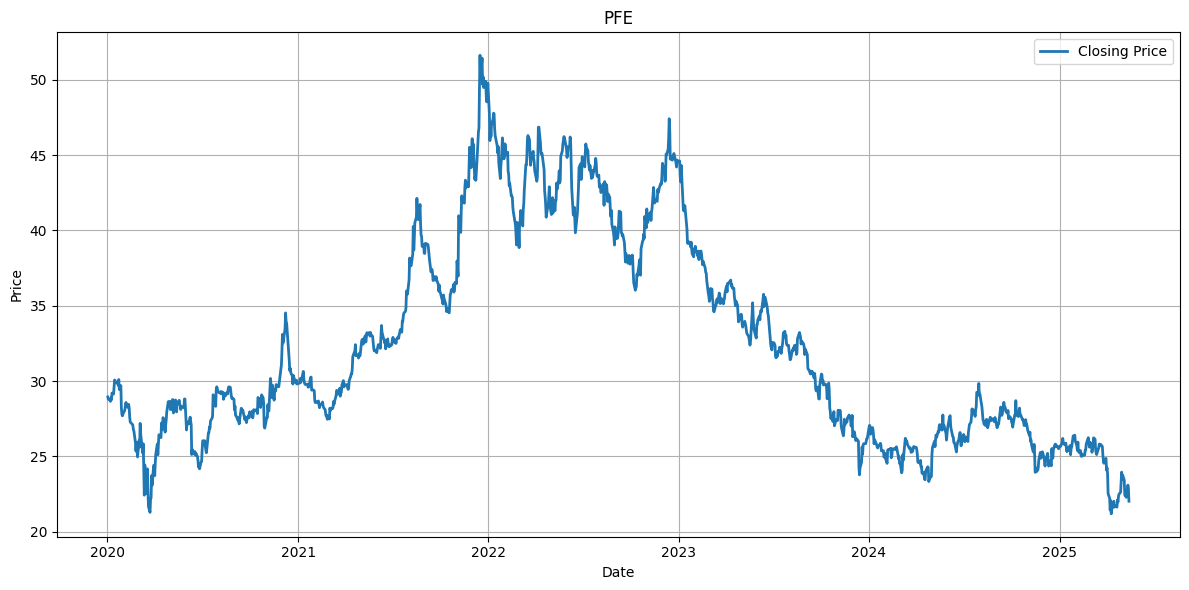

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Closing Price", linewidth=2)
plt.title("PFE")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
def plot(ticker, start, end):
    data = yf.Ticker(ticker).history(start=start, end=end, interval="1d")
    df = pd.DataFrame(data).dropna()
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df["Close"], label="Closing Price", linewidth=2)
    plt.title(ticker)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

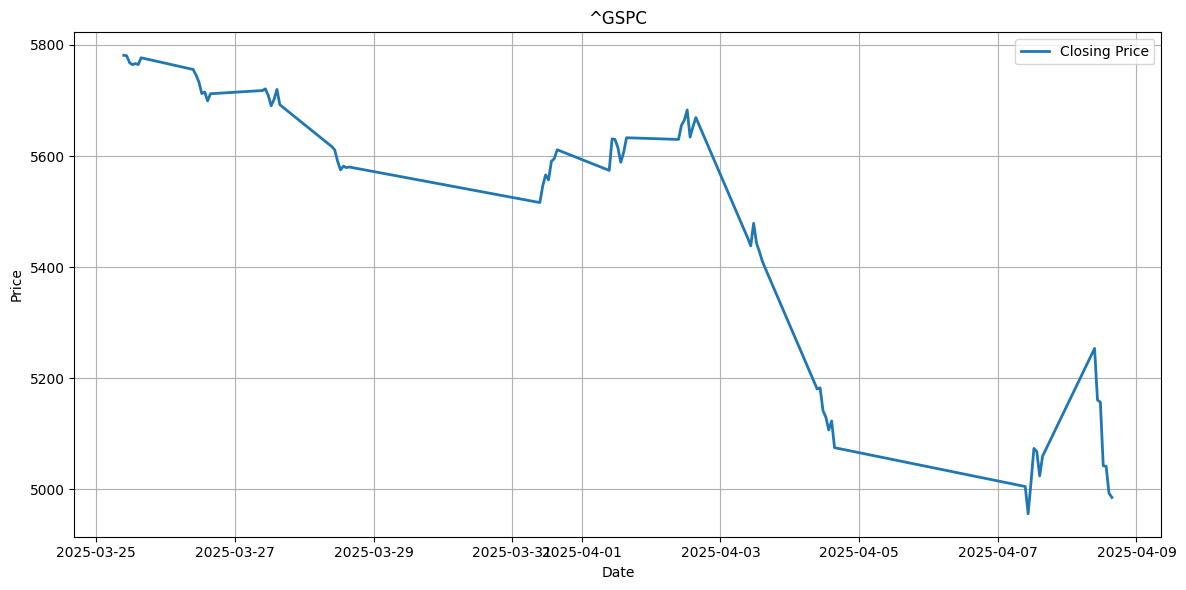

In [22]:
plot("^GSPC", "2025-03-25", end="2025-04-09")

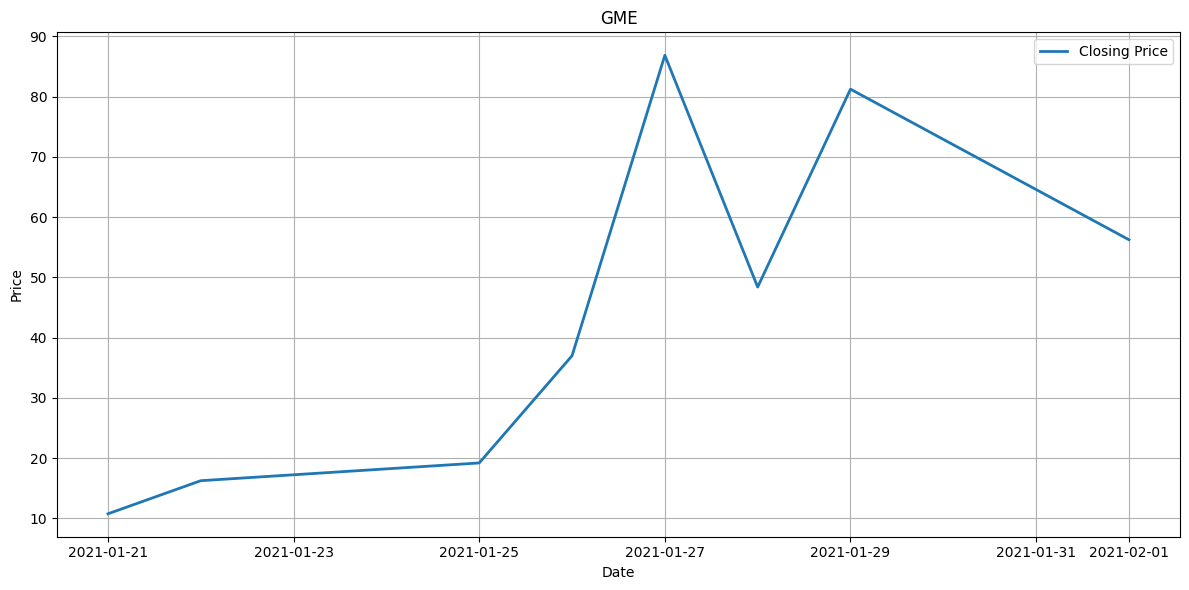

In [25]:
plot("GME", "2021-01-21", end="2021-02-02")

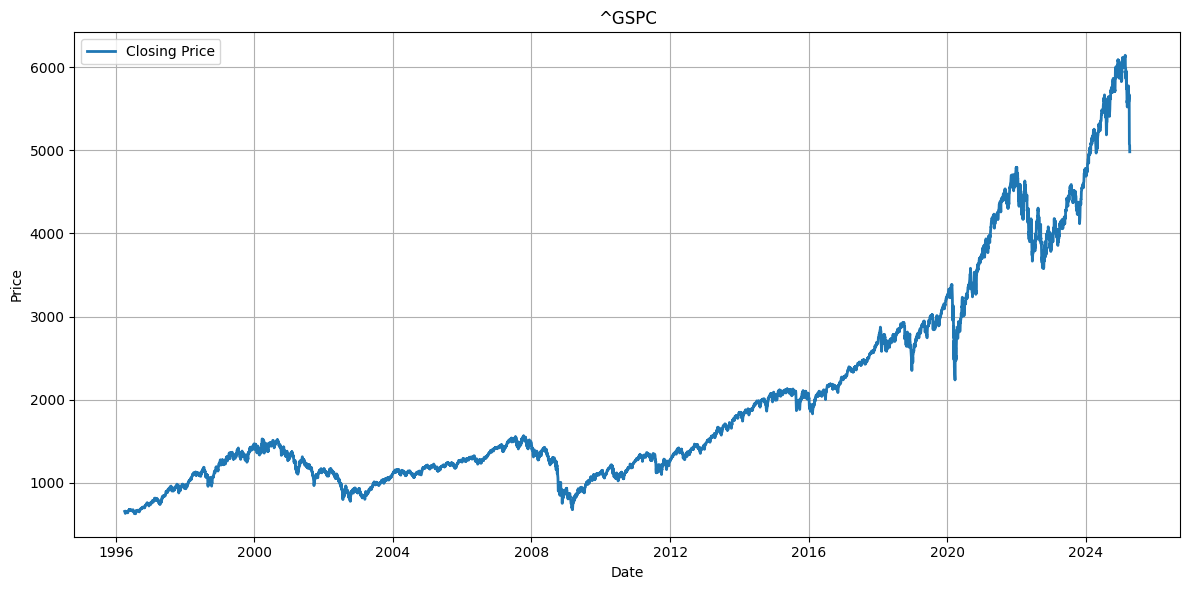

In [26]:
plot("^GSPC", "1996-04-04", end="2025-04-09")

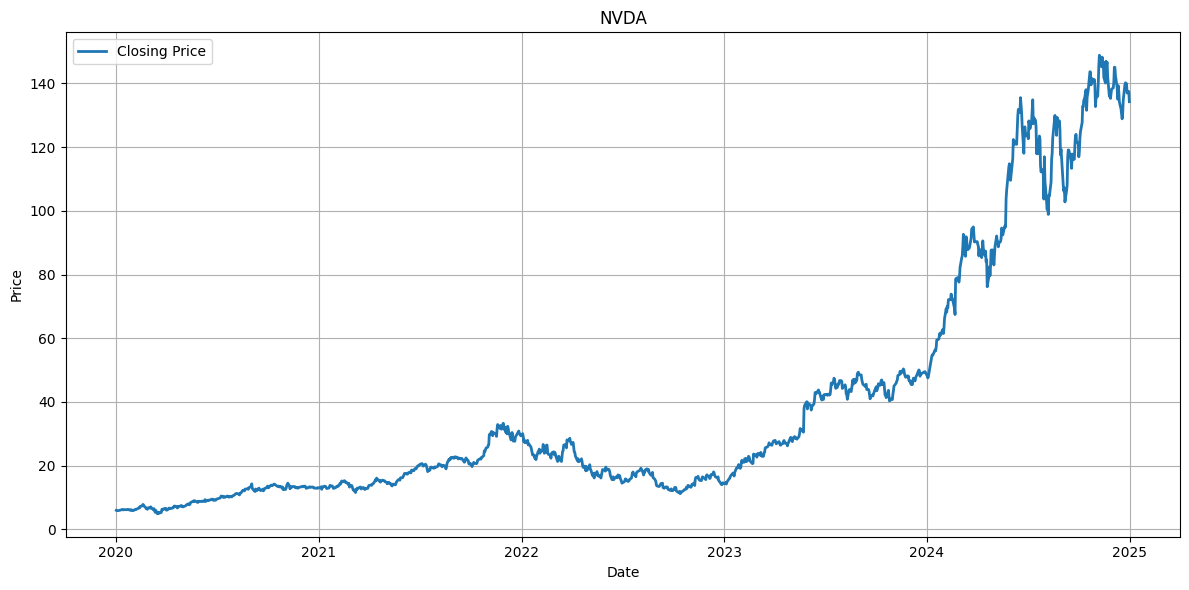

In [27]:
plot("NVDA", "2020-01-01", end="2025-01-01")

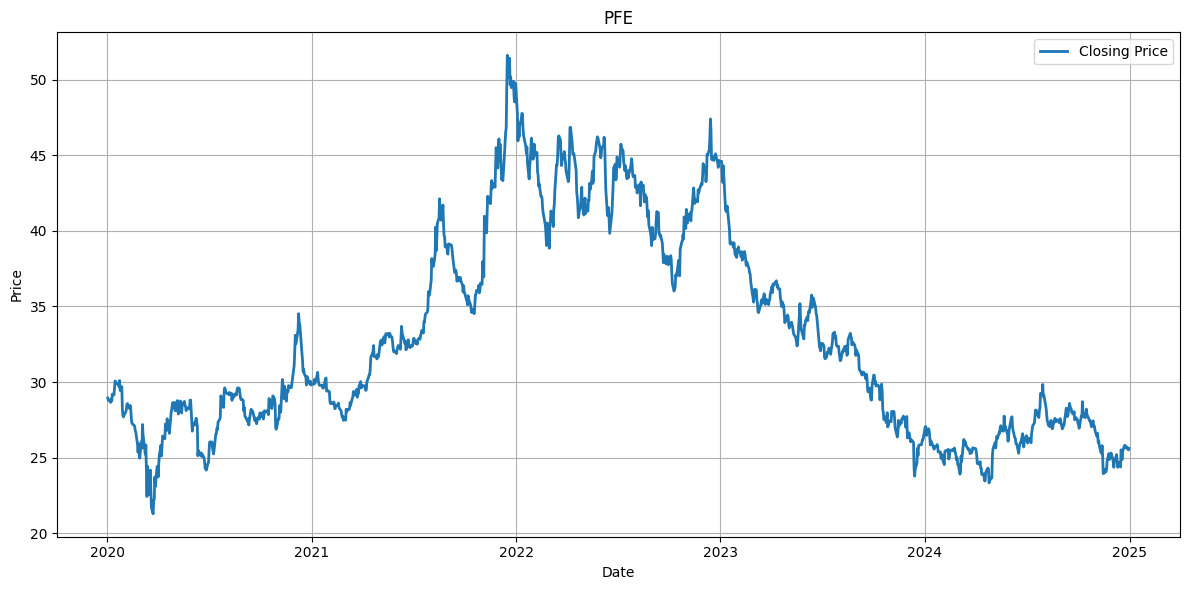

In [28]:
plot("PFE", "2020-01-01", end="2025-01-01")